In [182]:
import tensorflow as tf
from keras.preprocessing import image
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Reading the images and converting all to the array

In [183]:
categories = ['With_Mask','Without_Mask']

In [185]:
data = []
for category in categories:
    path = os.path.join('train', category)
    
    label = categories.index(category)
    
    
    for file in os.listdir(path):
        img_path = os.path.join(path,file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))  ###224 because vgg support only 224 size 
        
        data.append([img,label])
        
        

In [186]:
len(data)

1950

In [187]:
import random

random.shuffle(data)   ##if we dont shuffle it may generate bias 

In [188]:
X = [] ## data features
y = [] ## label

for features,label in data:
    X.append(features)
    y.append(label)

    
X = np.array(X)
y = np.array(y)
    

In [189]:
X.shape

(1950, 224, 224, 3)

In [190]:
y.shape

(1950,)

In [191]:
# Normalizing 
X = X/255

In [192]:
X[0]

array([[[0.51372549, 0.61568627, 0.8       ],
        [0.47058824, 0.59215686, 0.79607843],
        [0.6627451 , 0.7254902 , 0.83137255],
        ...,
        [0.70196078, 0.69019608, 0.63529412],
        [0.70980392, 0.69803922, 0.64313725],
        [0.71372549, 0.70196078, 0.64705882]],

       [[0.36470588, 0.49803922, 0.73333333],
        [0.29019608, 0.4627451 , 0.70980392],
        [0.31372549, 0.47843137, 0.71764706],
        ...,
        [0.70980392, 0.69019608, 0.63921569],
        [0.70980392, 0.69803922, 0.65098039],
        [0.71764706, 0.70588235, 0.65490196]],

       [[0.36470588, 0.5254902 , 0.72941176],
        [0.48627451, 0.61568627, 0.76862745],
        [0.51764706, 0.6       , 0.74117647],
        ...,
        [0.70588235, 0.69803922, 0.63921569],
        [0.71372549, 0.69803922, 0.65490196],
        [0.72156863, 0.70588235, 0.6627451 ]],

       ...,

       [[0.57254902, 0.62745098, 0.80392157],
        [0.64705882, 0.69019608, 0.82745098],
        [0.67843137, 0

## Deep learning model for training --> Transfer Learning

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [136]:
x_train.shape

(1560, 224, 224, 3)

In [137]:
x_test.shape

(390, 224, 224, 3)

In [138]:
from keras.applications.vgg16 import VGG16 

In [139]:
vgg = VGG16()

In [140]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [141]:
from keras import Sequential

In [142]:
model = Sequential()

In [143]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [144]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [145]:
for layer in model.layers:
    layer.trainable=False         ##freezing the layer

In [146]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [147]:
from keras.layers import Dense

In [148]:
model.add(Dense(1, activation='sigmoid'))  ## adding output layer

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [150]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
model.fit(x_train,y_train, epochs=6, batch_size=1, validation_data=[x_test,y_test])

Epoch 1/6
1560/1560 [==============================] - 2215s 1s/step - loss: 0.1924 - accuracy: 0.9263 - val_loss: 0.2231 - val_accuracy: 0.8897
Epoch 2/6
1560/1560 [==============================] - 1458s 935ms/step - loss: 0.0745 - accuracy: 0.9737 - val_loss: 0.0812 - val_accuracy: 0.9615
Epoch 3/6
1560/1560 [==============================] - 1360s 872ms/step - loss: 0.0496 - accuracy: 0.9814 - val_loss: 0.0132 - val_accuracy: 0.9974
Epoch 4/6
1560/1560 [==============================] - 1345s 862ms/step - loss: 0.0253 - accuracy: 0.9936 - val_loss: 0.0079 - val_accuracy: 0.9974
Epoch 5/6
1560/1560 [==============================] - 1337s 857ms/step - loss: 0.0305 - accuracy: 0.9891 - val_loss: 0.0150 - val_accuracy: 0.9974
Epoch 6/6
1560/1560 [==============================] - 1334s 855ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.0061 - val_accuracy: 0.9949


In [198]:
model.save('my_model3.h5')

In [199]:
model = tf.keras.models.load_model('my_model3.h5')

In [153]:
def detect_face_mask(img):
    y_pred = model.predict(img.reshape(1,224,224,3))
    
    return y_pred

    

In [154]:
sample1 = cv2.imread('C:\\Users\\sherk\\OneDrive\\Desktop\\Face Mask Detection 2\\sample\\00002_Mask.jpg')
sample1 = cv2.resize(sample1,(224,224))

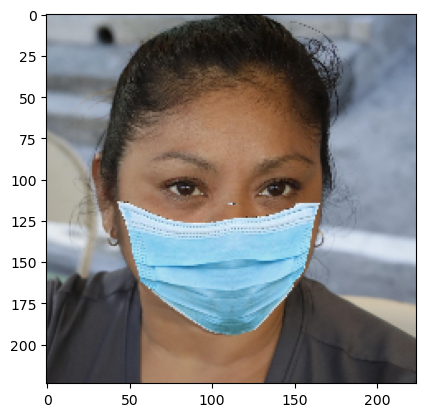

In [155]:
plt.imshow(cv2.cvtColor(sample1,cv2.COLOR_BGR2RGB))
plt.show()

In [156]:
detect_face_mask(sample1)

1/1 [==============================] - 1s 880ms/step


array([[0.]], dtype=float32)

In [157]:
sample2 = cv2.imread('C:\\Users\\sherk\\OneDrive\\Desktop\\Face Mask Detection 2\\sample\\sad women face.jpg')
sample2 = cv2.resize(sample2,(224,224))

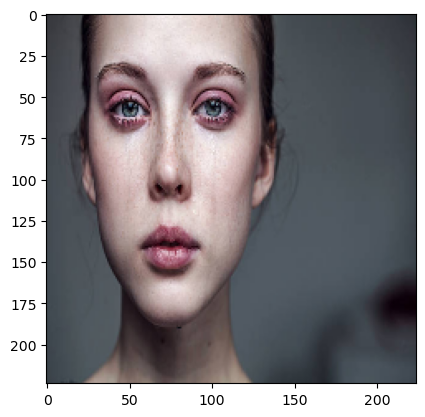

In [158]:
plt.imshow(cv2.cvtColor(sample2,cv2.COLOR_BGR2RGB))
plt.show()

In [159]:
detect_face_mask(sample2)

1/1 [==============================] - 1s 692ms/step


array([[1.]], dtype=float32)

In [160]:
sample3 = cv2.imread('C:\\Users\\sherk\\OneDrive\\Desktop\\face mask sample_.jpg')
sample3 = cv2.resize(sample3,(224,224))

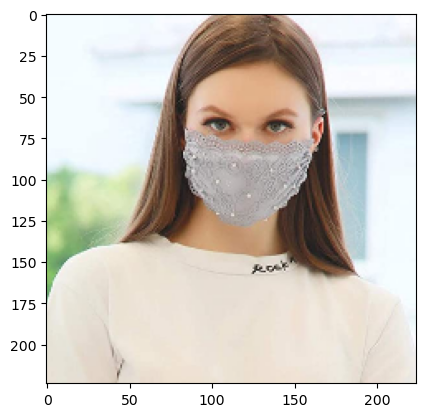

In [161]:
plt.imshow(cv2.cvtColor(sample3,cv2.COLOR_BGR2RGB))
plt.show()

In [162]:
detect_face_mask(sample3)

1/1 [==============================] - 1s 726ms/step


array([[2.5686494e-34]], dtype=float32)

In [163]:
def draw_label(img,text,pos,bg_color):
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX,1, cv2.FILLED)
    
    end_x = pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] - 2
    
    cv2.rectangle(img,pos, (end_x, end_y),bg_color, cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [175]:
haar = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") ## 

In [176]:
def detect_face(img):
    coods = haar.detectMultiScale(img)
    return coods

In [195]:
import winsound
frequency = 2500
duration = 1000

In [197]:
cap = cv2.VideoCapture(0)
    
while True:
    ret, frame = cap.read()
    
    ## call the detection method
    img = cv2.resize(frame,(224,224))
    y_pred = detect_face_mask(img)
    print(y_pred)
#     cood = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))  ## for face detection
     
#     for x,y,w,h in cood:
#         cv2.rectangle(frame, (x,y),(x+w, y+h),(255,0,0),3)
    
    
    if y_pred == 1:
        draw_label(frame, 'No_Mask',(10,10),(0,255,0))
        winsound.Beep(frequency,duration)
    else:
        draw_label(frame,'Mask',(10,10),(0,0,255))
    
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()        
    
#     

1/1 [==============================] - 1s 834ms/step
[[1.]]
1/1 [==============================] - 1s 853ms/step
[[1.]]
1/1 [==============================] - 1s 843ms/step
[[1.]]
1/1 [==============================] - 1s 860ms/step
[[1.]]
1/1 [==============================] - 1s 831ms/step
[[1.]]
1/1 [==============================] - 1s 841ms/step
[[0.9752075]]
1/1 [==============================] - 1s 828ms/step
[[0.9999763]]
1/1 [==============================] - 1s 836ms/step
[[0.9999929]]
1/1 [==============================] - 1s 837ms/step
[[0.9999998]]
1/1 [==============================] - 1s 824ms/step
[[0.9999996]]
1/1 [==============================] - 1s 836ms/step
[[0.9999997]]
1/1 [==============================] - 1s 831ms/step
[[1.]]
1/1 [==============================] - 1s 838ms/step
[[1.]]
1/1 [==============================] - 1s 831ms/step
[[1.]]
1/1 [==============================] - 1s 815ms/step
[[1.]]
1/1 [==============================] - 1s 834ms/step
[[1.]

KeyboardInterrupt: 